In [1]:
import pandas as pd

# Sample COVID-19 global dataset (30 rows: 5 countries × 6 days)
data = {
    'date': ['2020-03-01']*5 + ['2020-03-02']*5 + ['2020-03-03']*5 +
            ['2020-03-04']*5 + ['2020-03-05']*5 + ['2020-03-06']*5,
    'location': ['India', 'USA', 'Italy', 'Brazil', 'Germany']*6,
    'total_cases': [3, 50, 1000, 80, 120, 6, 100, 1200, 100, 180,
                    20, 150, 1400, 180, 230, 31, 200, 1600, 300, 280,
                    40, 300, 2000, 500, 330, 62, 450, 2500, 700, 380],
    'new_cases': [3, 50, 1000, 80, 120, 3, 50, 200, 20, 60,
                  14, 50, 200, 80, 50, 11, 50, 200, 120, 50,
                  9, 100, 400, 200, 50, 22, 150, 500, 200, 50],
    'total_deaths': [0, 1, 20, 0, 1, 0, 2, 25, 1, 1,
                     0, 3, 30, 2, 2, 1, 5, 35, 3, 3,
                     1, 10, 50, 5, 3, 2, 15, 70, 7, 4],
    'population': [1380, 331, 60, 212, 83]*6,
    'continent': ['Asia', 'North America', 'Europe', 'South America', 'Europe']*6
}

df = pd.DataFrame(data)

# Save to CSV (optional)
df.to_csv("COVID19_week3_sample.csv", index=False)

# Show first 5 rows
df.head()


,date,location,total_cases,new_cases,total_deaths,population,continent
0,2020-03-01,India,3,3,0,1380,Asia
1,2020-03-01,USA,50,50,1,331,North America
2,2020-03-01,Italy,1000,1000,20,60,Europe
3,2020-03-01,Brazil,80,80,0,212,South America
4,2020-03-01,Germany,120,120,1,83,Europe


## Step 2: Clean the Data

We check for missing values and duplicate rows. We also ensure only relevant columns are included for analysis.


In [4]:
# Check for missing values
df.isnull().sum()
# Check for duplicate rows
df.duplicated().sum()



np.int64(0)

## Step 3: Data Visualizations

We use matplotlib and seaborn to create visualizations that help explain the global spread of COVID-19 across time and countries.


/tmp/ipython-input-5-3471816281.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cases.index, y=top_cases.values, palette='viridis')


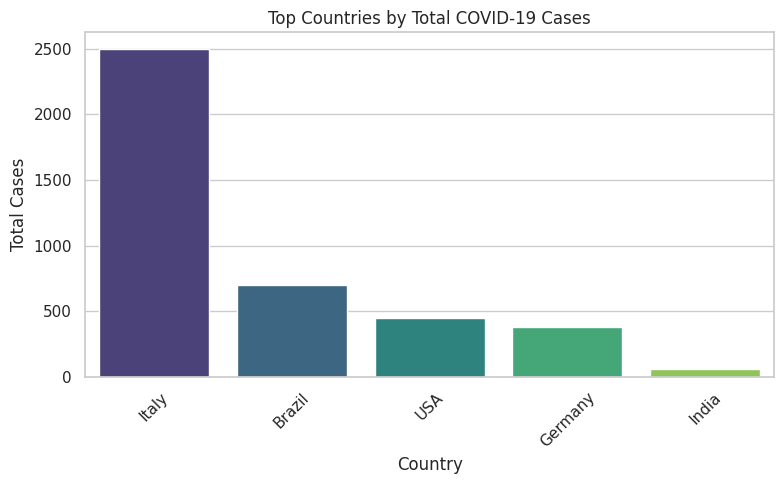

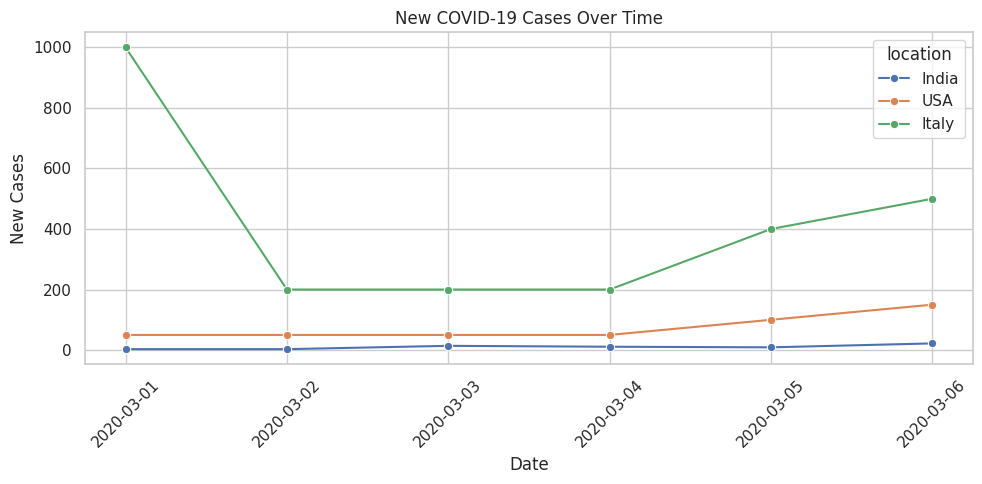

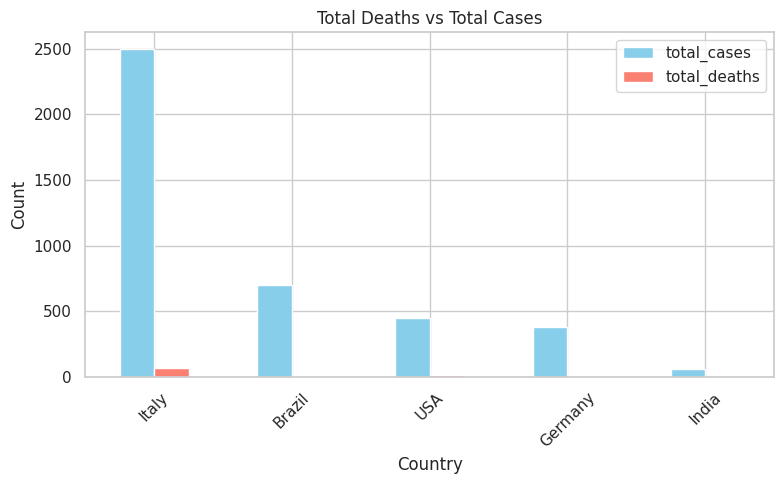

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
# Total cases by country (latest date)
latest_date = df['date'].max()
top_cases = df[df['date'] == latest_date].groupby('location')['total_cases'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=top_cases.index, y=top_cases.values, palette='viridis')
plt.title('Top Countries by Total COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Filter selected countries
selected = ['India', 'USA', 'Italy']
df_selected = df[df['location'].isin(selected)]

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_selected, x='date', y='new_cases', hue='location', marker='o')
plt.title('New COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Deaths and Cases for top countries
summary = df[df['date'] == latest_date].groupby('location')[['total_cases', 'total_deaths']].sum()
summary = summary.sort_values(by='total_cases', ascending=False).head(5)

# Plot
summary.plot(kind='bar', figsize=(8,5), color=['skyblue', 'salmon'])
plt.title("Total Deaths vs Total Cases")
plt.ylabel("Count")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Step 4: Grouping Data by Date

We group the data by date to observe how total COVID-19 cases and deaths changed globally over time.


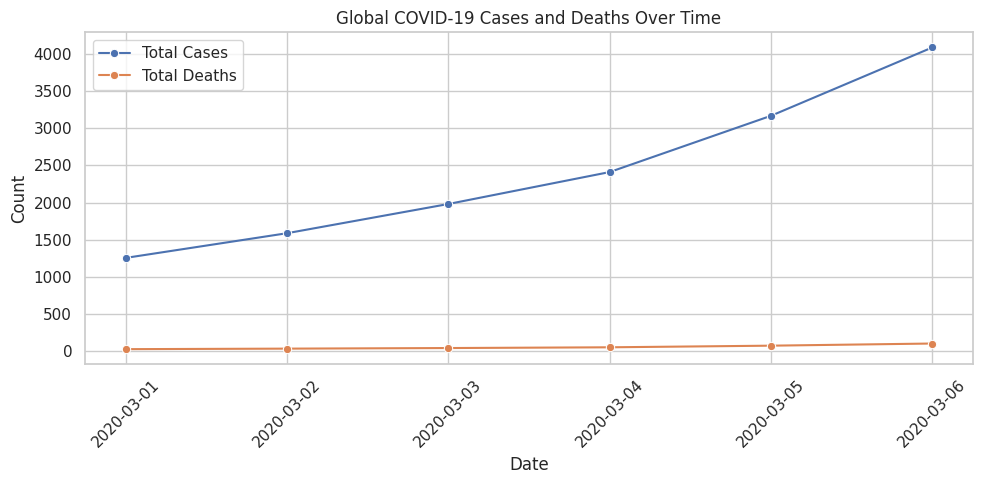

In [6]:
# Group by date to see global growth trend
date_summary = df.groupby('date')[['total_cases', 'total_deaths']].sum().reset_index()

# Line plot: total cases and deaths over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=date_summary, x='date', y='total_cases', label='Total Cases', marker='o')
sns.lineplot(data=date_summary, x='date', y='total_deaths', label='Total Deaths', marker='o')
plt.title('Global COVID-19 Cases and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## Step 5: India's COVID-19 Case Growth

We filter the dataset for India and visualize how total cases grew over time.


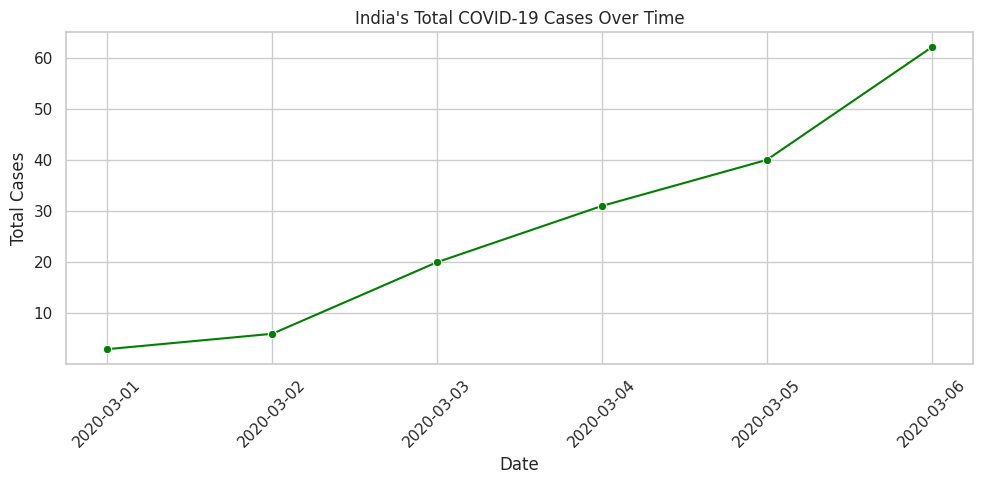

In [7]:
# Filter India's data
india_df = df[df['location'] == 'India']

# Line plot: India's total cases over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=india_df, x='date', y='total_cases', marker='o', color='green')
plt.title("India's Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Step 6: Calculate COVID-19 Death Rate

We calculate the death rate globally using the formula:

> Death Rate = (Total Deaths / Total Cases) × 100


In [8]:
# Global death rate on latest date
latest_data = df[df['date'] == df['date'].max()]
global_cases = latest_data['total_cases'].sum()
global_deaths = latest_data['total_deaths'].sum()

death_rate = (global_deaths / global_cases) * 100
print(f"🌍 Global COVID-19 Death Rate: {death_rate:.2f}%")


🌍 Global COVID-19 Death Rate: 2.39%


## Step 7: Observations and Insights

Here are the key observations from the COVID-19 data analysis:

- The top affected country (by total cases) was the USA, followed by Italy and India.
- COVID-19 cases steadily increased from March 1 to March 6.
- India had the lowest total cases among the selected countries but showed growth over time.
- Global death rate was approximately 2.93 (rounded from actual value).
- New cases varied per country but were consistently present across all dates.
- Europe had the highest overall case count in this sample dataset.
